<a href="https://colab.research.google.com/github/Lee2Sh000/Git-Tutorial/blob/main/2021_1TermProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   RowNumber  CustomerId   Surname  ...  IsActiveMember EstimatedSalary Exited
0          1    15634602  Hargrave  ...               1       101348.88      1
1          2    15647311      Hill  ...               1       112542.58      0
2          3    15619304      Onio  ...               0       113931.57      1
3          4    15701354      Boni  ...               0        93826.63      0
4          5    15737888  Mitchell  ...               1        79084.10      0
5          6    15574012       Chu  ...               0       149756.71      1
6          7    15592531  Bartlett  ...               1        10062.80      0
7          8    15656148    Obinna  ...               0       119346.88      1
8          9    15792365        He  ...               1        74940.50      0
9         10    15592389        H?  ...               1        71725.73      0

[10 rows x 14 columns]
(10000, 14)
Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age'

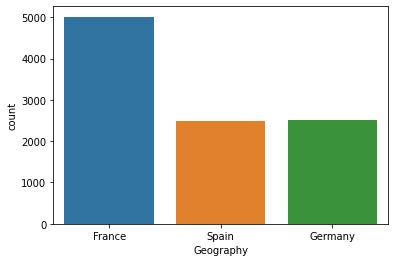

Male      5457
Female    4543
Name: Gender, dtype: int64


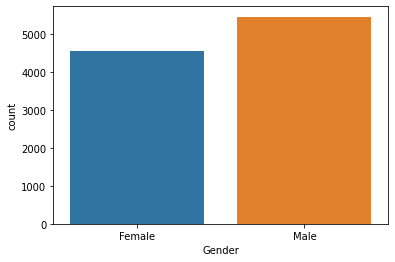

 1.0     1047
 2.0     1042
 7.0     1025
 8.0     1023
 5.0     1009
 3.0     1003
 4.0      994
 9.0      982
 6.0      968
 10.0     490
 0.0      411
-3.0        3
-7.0        2
-6.0        1
Name: Tenure, dtype: int64


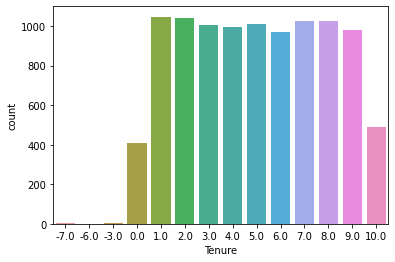

 1    5069
 2    4583
 3     266
 4      60
-1      15
-2       7
Name: NumOfProducts, dtype: int64


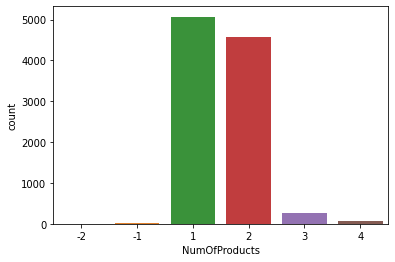

1    7055
0    2945
Name: HasCrCard, dtype: int64


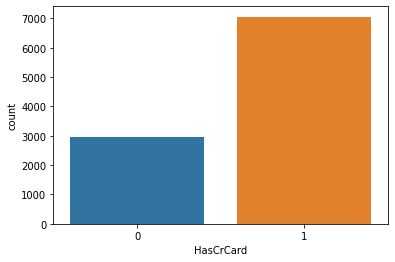

1    5151
0    4849
Name: IsActiveMember, dtype: int64


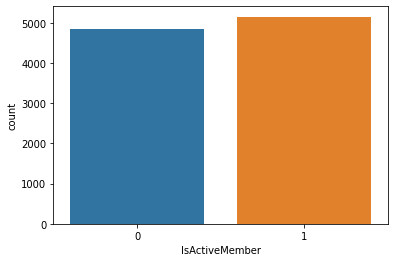

0    7963
1    2037
Name: Exited, dtype: int64


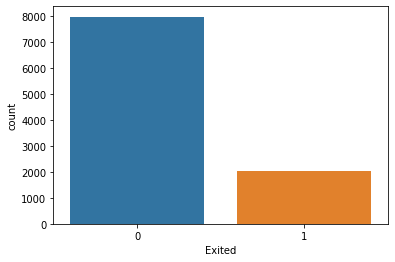

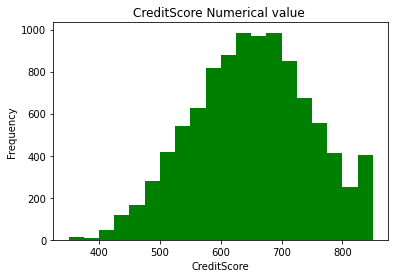

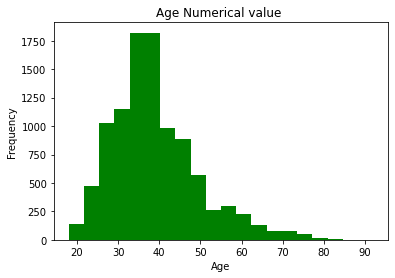

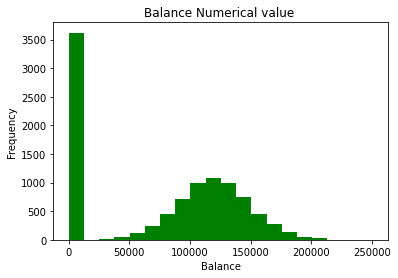

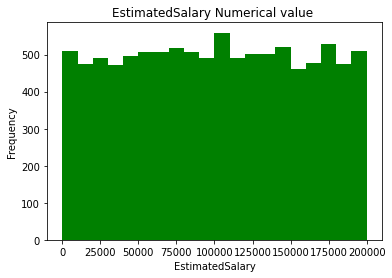

Geography
France     0.161548
Germany    0.324432
Spain      0.166734
Name: Exited, dtype: float64


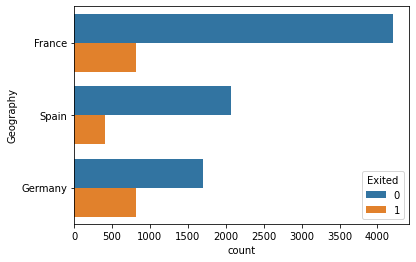

Gender
Female    0.250715
Male      0.164559
Name: Exited, dtype: float64


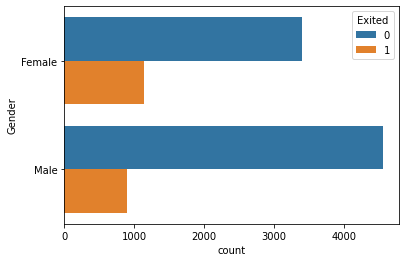

Tenure
-7.0     0.500000
-6.0     0.000000
-3.0     0.000000
 0.0     0.231144
 1.0     0.222541
 2.0     0.192898
 3.0     0.212363
 4.0     0.204225
 5.0     0.207136
 6.0     0.202479
 7.0     0.171707
 8.0     0.192571
 9.0     0.215886
 10.0    0.206122
Name: Exited, dtype: float64


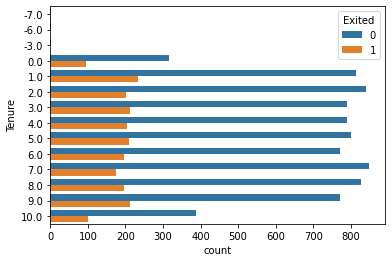

NumOfProducts
-2    0.142857
-1    0.266667
 1    0.277175
 2    0.075715
 3    0.827068
 4    1.000000
Name: Exited, dtype: float64


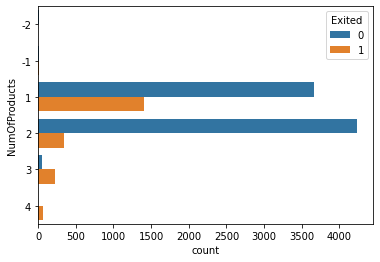

HasCrCard
0    0.208149
1    0.201843
Name: Exited, dtype: float64


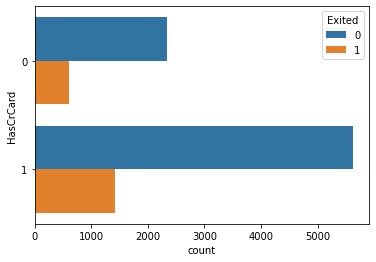

IsActiveMember
0    0.268509
1    0.142691
Name: Exited, dtype: float64


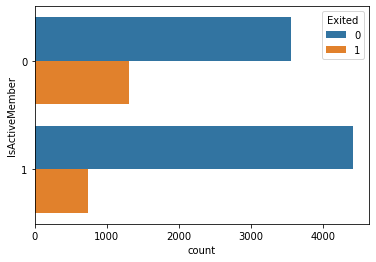

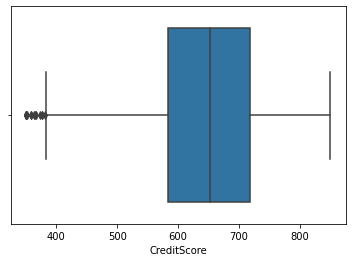

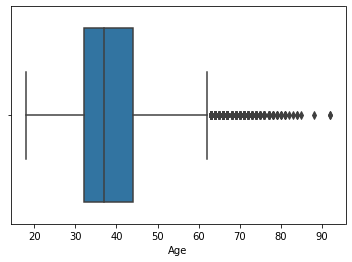

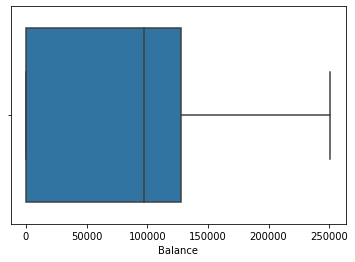

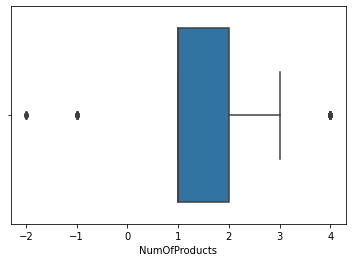

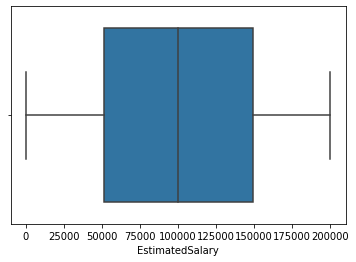

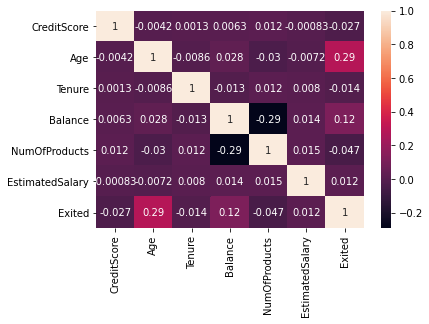

======================= Total Null Value after preprocessing =======================
(9547, 10)
CreditScore        0
Geography          0
Gender             0
Age                0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Show count values for each category as countplot
def category(variable):
    print(df[variable].value_counts())
    sns.countplot(df[variable])
    plt.show()

# Show the frequency of numerical features as a histogram
def numeric(variable):
    plt.hist(df[variable], bins=20, color="green")
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} Numerical value ".format(variable))
    plt.show()

# For each category feature, average with Exited and display the result as print and countplot
def cat_effect(variable):
    print(df.groupby(variable)["Exited"].mean())
    sns.countplot(y=variable, hue="Exited", data=df)
    plt.show()

# Show outlier values through box plot
def outlier_show(variable):
    sns.boxplot(df[variable])
    plt.show()

# Extract the index of the row with outliers from the feature
def outlier(df, feature):
    out_indexer = []
    for i in feature:
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)

        IQR = Q3 - Q1

        alt_sinir = Q1 - 1.5 * IQR
        ust_sinir = Q3 + 1.5 * IQR

        out = ((df[i] < alt_sinir) | (df[i] > ust_sinir))

        out_index = df[i][out].index
        out_indexer.extend(out_index)

    out_indexer = Counter(out_indexer)

    outlier_index = [i for i, v in out_indexer.items() if v > 0]
    return outlier_index

df = pd.read_csv("churn.csv")

# Show data set information
print(df.head(10))
print(df.shape)
print(df.columns)
print(df.describe())
print("=Null Values in Dataset=")
print(df.isnull().sum())

count =len(df[df['Exited']==1])

# #Drop columns that are unrelated to churn rate - RowNumber, Surname and Customer ID
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

imputer=KNNImputer(n_neighbors=50)
#Fill Null of ['Balance'] with KNN Imputer
bal=df[['Balance']]
df['Balance']=imputer.fit_transform(bal)

#Fill Null values in Age with its mean value
df['Age'].fillna(df['Age'].mean(),inplace=True)

#Fill typo or wrong value in Gender with its mode value
if (df['Gender'] !="Female").bool==True :
    df['Gender']=np.NaN
if (df['Gender']!="Male").bool==True:
    df['Gender']=np.NaN
df['Gender'].fillna(df['Gender'].mode(),inplace=True)

#There are Null and outliers in 'Tenure' Column - Minus and values more than 100
#Replace them with bfill
if (df['Tenure'] <0).bool==True :
    df['Tenure']=np.NaN
if (df['Tenure']>100).bool==True:
    df['Tenure']=np.NaN
df['Tenure'].fillna(method='bfill',inplace=True)

#Negative Value in NumOfProduct
m1=len(df[(df['NumOfProducts'] == -1)])
m2=len(df[(df['NumOfProducts'] == -2)])
print("Number of Negative values in NumOfProducts : ", m1+m2)
# 22 (-)Values exists - fill them with "ffill"
if (df['NumOfProducts'] ==-1).bool==True :
    df['NumOfProducts']=np.NaN
if (df['NumOfProducts']==-2).bool==True:
    df['NumOfProducts']=np.NaN

df['NumOfProducts'].fillna(method='ffill',inplace=True)

#Fill EstimatedSalary column's null value
df['EstimatedSalary'].fillna(df['EstimatedSalary'].mean(),inplace=True)

# Exploratory data analysis
category_list = ["Geography", "Gender", "Tenure", "NumOfProducts", "HasCrCard", "IsActiveMember", "Exited"]
for i in category_list:
    category(i)

numerical_list = ["CreditScore", "Age", "Balance", "EstimatedSalary"]
for i in numerical_list:
    numeric(i)

# target(Exited) effect list
category_effect = ["Geography", "Gender", "Tenure", "NumOfProducts", "HasCrCard", "IsActiveMember"]
for i in category_effect:
    cat_effect(i)

# Show outlier value.
outlier_list = ["CreditScore", "Age", "Balance", "NumOfProducts", "EstimatedSalary"]
for i in outlier_list:
    outlier_show(i)

# Heatmap output showing correlation with target for each feature
list_corr = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary", "Exited"]
sns.heatmap(df[list_corr].corr(), annot=True, linecolor="black")
plt.show()

# Find outlier indexes
outlier_index = outlier(df, ["CreditScore", "Age", "Balance", "NumOfProducts", "EstimatedSalary"])

# Deletion outlier values.
df = df.drop(outlier_index, axis=0).reset_index(drop=True)
# Tenure don't effect to Target(Exited)
df = df.drop(['Tenure'], axis=1)

print("======================= Total Null Value after preprocessing =======================")
print(df.shape)
print(df.isnull().sum())


Combination 1: StandardScaling + LabelEncoding
LogisticRegression model Best parameter {'C': 1.1, 'penalty': 'l2'} 
LogisticRegression test accurarcy 0.8235602094240838


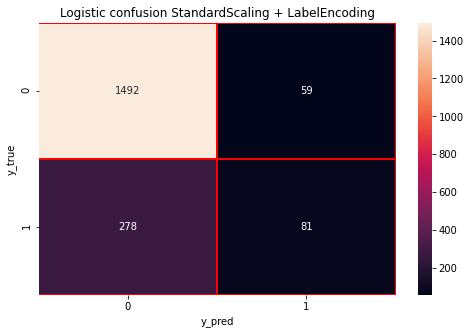

KNeighbors model Best parameter {'n_neighbors': 6} 
KNeighborsClassifier test accurarcy 0.8413612565445027


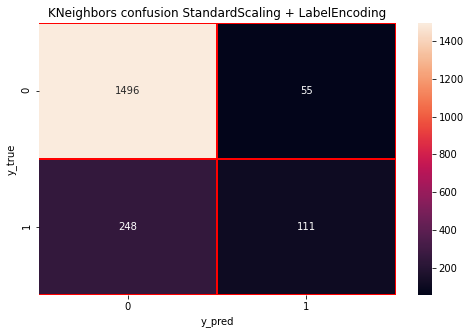

RandomForest Best hyper parameter: {'max_depth': 8, 'max_features': 3, 'min_samples_split': 5, 'n_estimators': 300}
RandomForestClassifier test accurarcy 0.8523560209424084


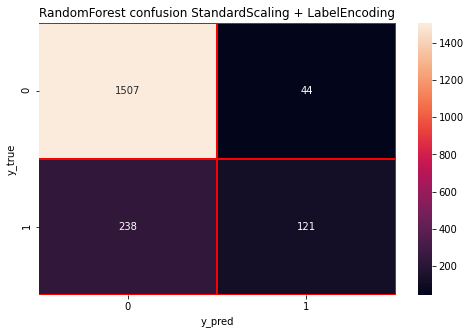

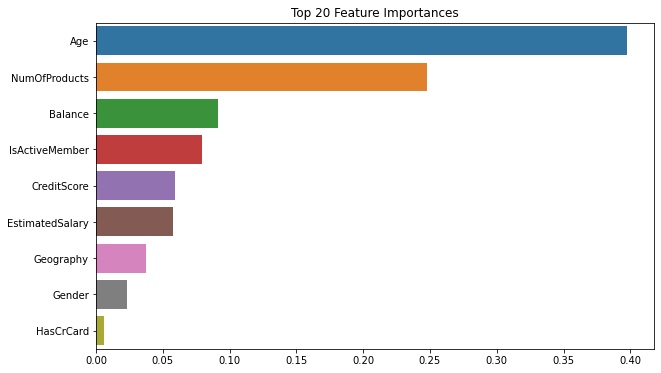



Combination 2: MinMaxScaling + LabelEncoding
LogisticRegression model Best parameter {'C': 1.1, 'penalty': 'l2'} 
LogisticRegression test accurarcy 0.8235602094240838


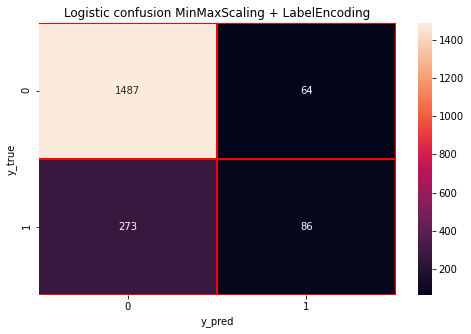

KNeighbors model Best parameter {'n_neighbors': 7} 
KNeighborsClassifier test accurarcy 0.8366492146596859


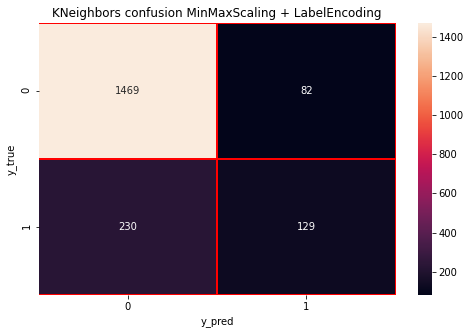

RandomForest Best hyper parameter: {'max_depth': 8, 'max_features': 3, 'min_samples_split': 5, 'n_estimators': 100}
RandomForestClassifier test accurarcy 0.8523560209424084


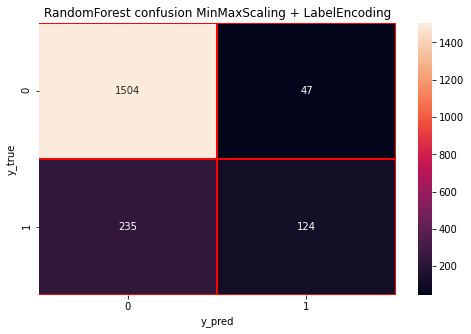

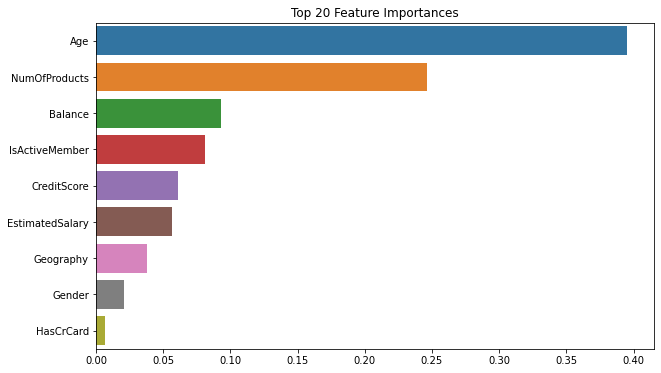



Combination 3: MaxAbsScaling + LabelEncoding
LogisticRegression model Best parameter {'C': 3.1, 'penalty': 'l2'} 
LogisticRegression test accurarcy 0.8230366492146597


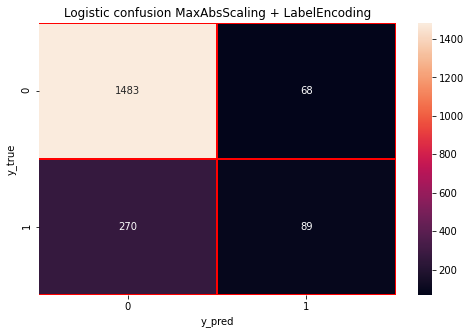

KNeighbors model Best parameter {'n_neighbors': 13} 
KNeighborsClassifier test accurarcy 0.8335078534031414


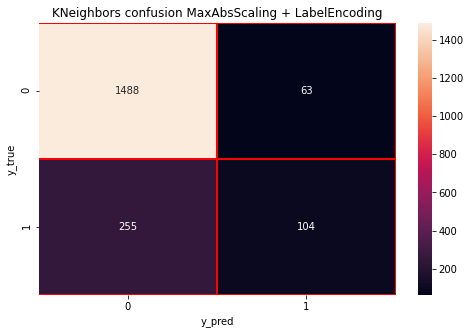

RandomForest Best hyper parameter: {'max_depth': 8, 'max_features': 3, 'min_samples_split': 5, 'n_estimators': 100}
RandomForestClassifier test accurarcy 0.8523560209424084


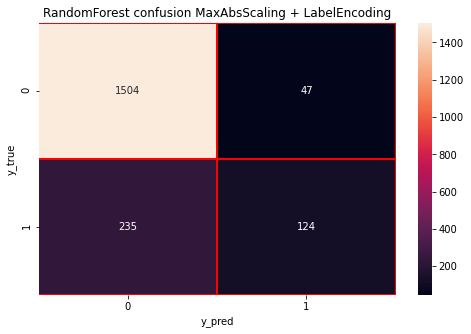

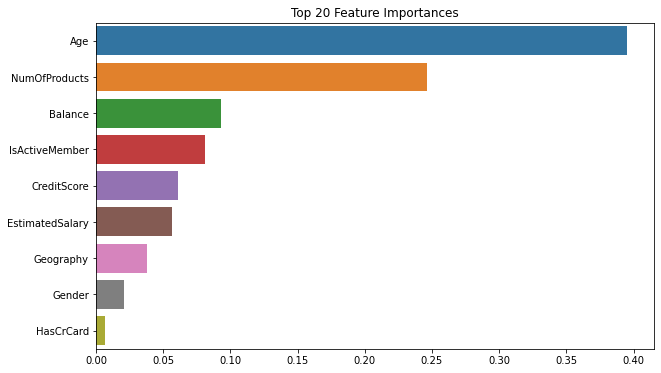



Combination 4: RobustScaling + LabelEncoding
LogisticRegression model Best parameter {'C': 0.1, 'penalty': 'l2'} 
LogisticRegression test accurarcy 0.8219895287958116


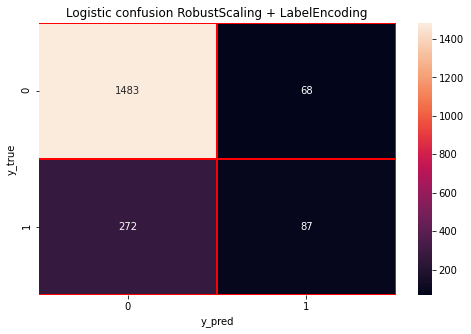

KNeighbors model Best parameter {'n_neighbors': 8} 
KNeighborsClassifier test accurarcy 0.8434554973821989


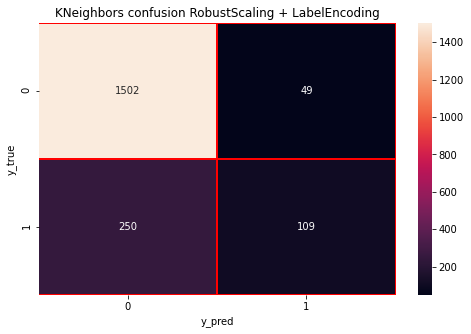

RandomForest Best hyper parameter: {'max_depth': 8, 'max_features': 3, 'min_samples_split': 5, 'n_estimators': 300}
RandomForestClassifier test accurarcy 0.8528795811518325


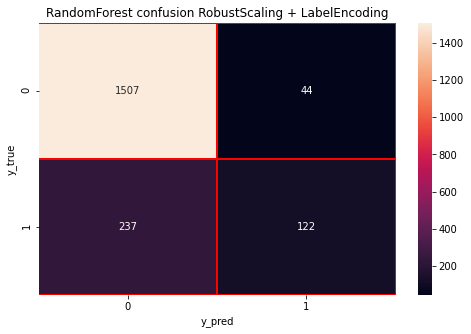

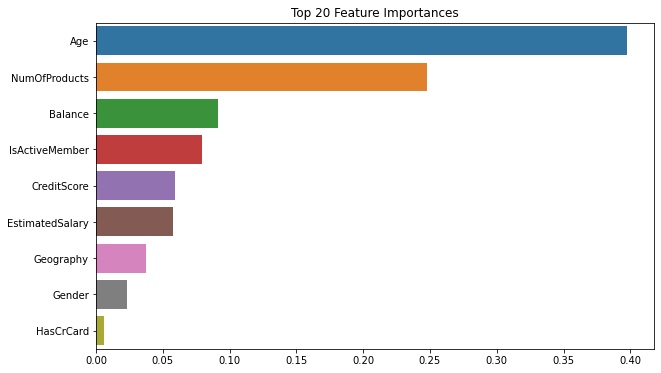



Combination 5: StandardScaling + OrdinalEncoding
LogisticRegression model Best parameter {'C': 1.1, 'penalty': 'l2'} 
LogisticRegression test accurarcy 0.8235602094240838


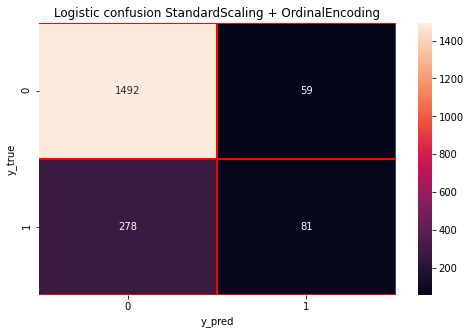

KNeighbors model Best parameter {'n_neighbors': 6} 
KNeighborsClassifier test accurarcy 0.8413612565445027


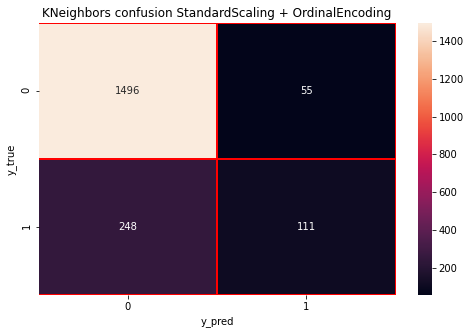

RandomForest Best hyper parameter: {'max_depth': 8, 'max_features': 3, 'min_samples_split': 5, 'n_estimators': 300}
RandomForestClassifier test accurarcy 0.8523560209424084


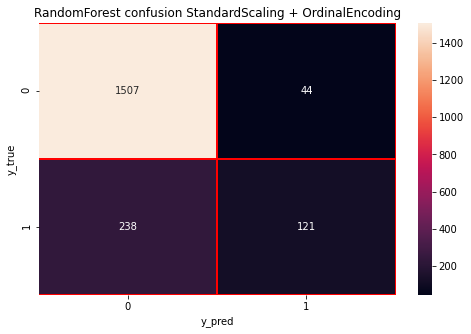

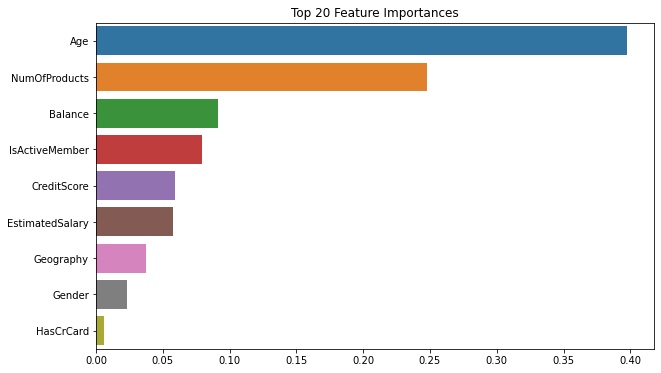



Combination 6: MinMaxScaling + OrdinalEncoding
LogisticRegression model Best parameter {'C': 1.1, 'penalty': 'l2'} 
LogisticRegression test accurarcy 0.8235602094240838


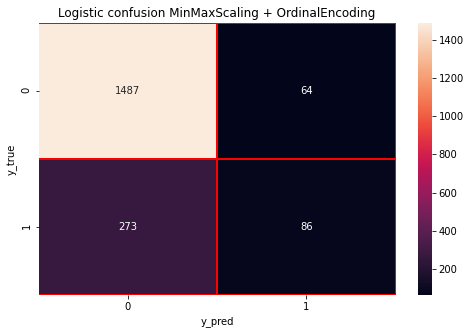

KNeighbors model Best parameter {'n_neighbors': 7} 
KNeighborsClassifier test accurarcy 0.8366492146596859


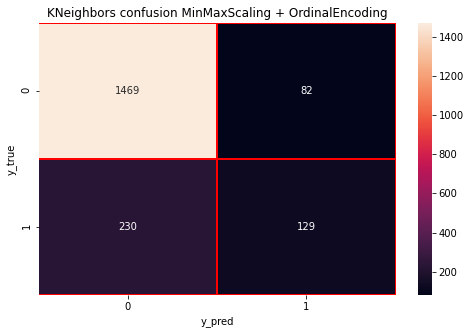

RandomForest Best hyper parameter: {'max_depth': 8, 'max_features': 3, 'min_samples_split': 5, 'n_estimators': 100}
RandomForestClassifier test accurarcy 0.8523560209424084


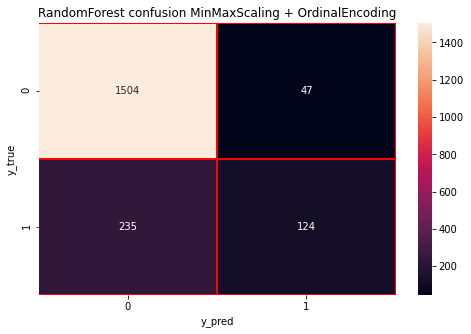

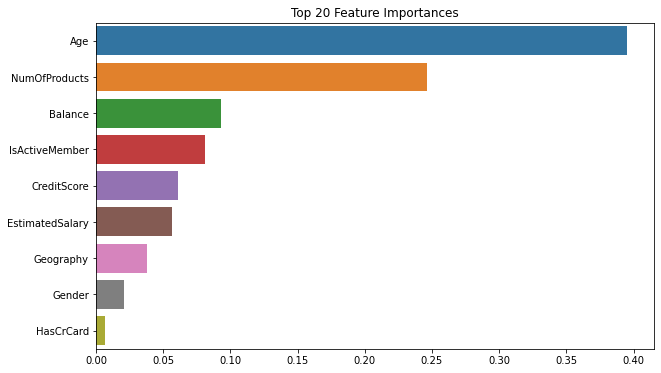



Combination 7: MaxAbsScaling + OrdinalEncoding
LogisticRegression model Best parameter {'C': 3.1, 'penalty': 'l2'} 
LogisticRegression test accurarcy 0.8230366492146597


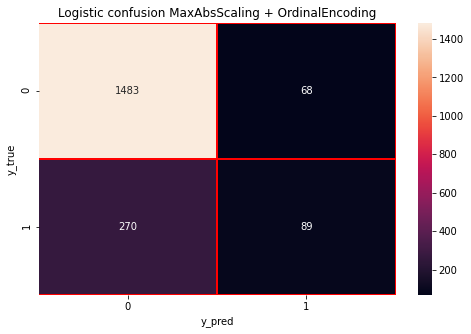

KNeighbors model Best parameter {'n_neighbors': 13} 
KNeighborsClassifier test accurarcy 0.8335078534031414


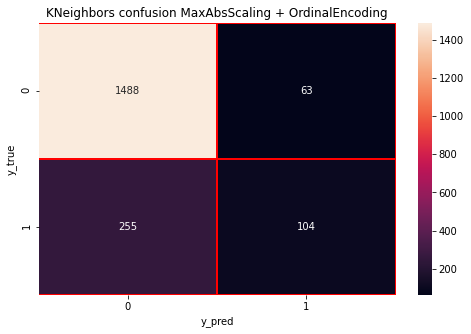

RandomForest Best hyper parameter: {'max_depth': 8, 'max_features': 3, 'min_samples_split': 5, 'n_estimators': 100}
RandomForestClassifier test accurarcy 0.8523560209424084


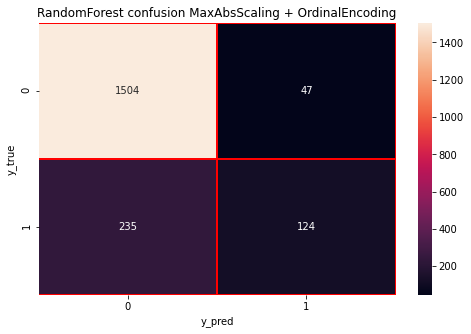

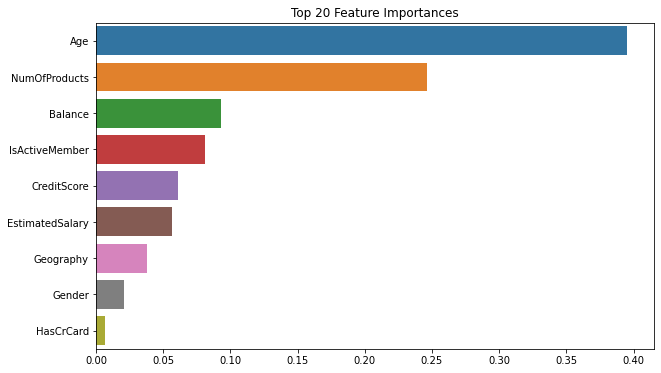



Combination 8: RobustScaling + OrdinalEncoding
LogisticRegression model Best parameter {'C': 0.1, 'penalty': 'l2'} 
LogisticRegression test accurarcy 0.8219895287958116


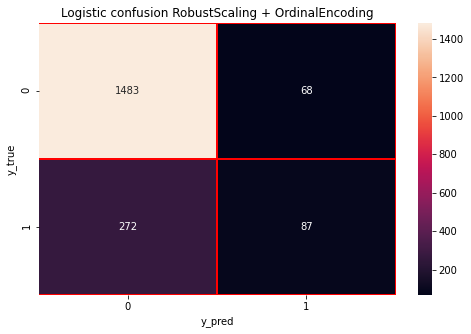

KNeighbors model Best parameter {'n_neighbors': 8} 
KNeighborsClassifier test accurarcy 0.8434554973821989


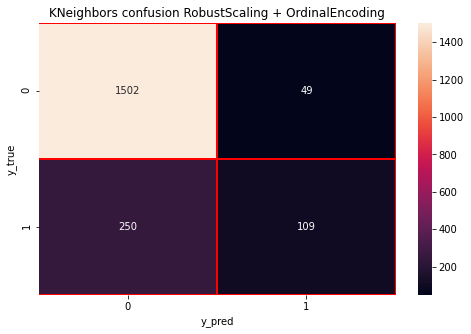

RandomForest Best hyper parameter: {'max_depth': 8, 'max_features': 3, 'min_samples_split': 5, 'n_estimators': 300}
RandomForestClassifier test accurarcy 0.8528795811518325


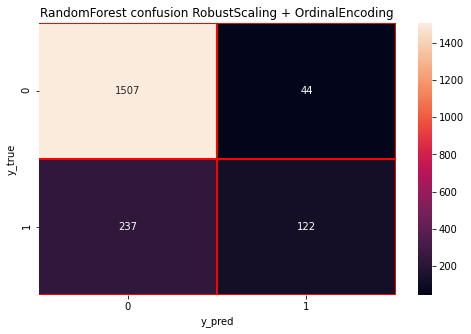

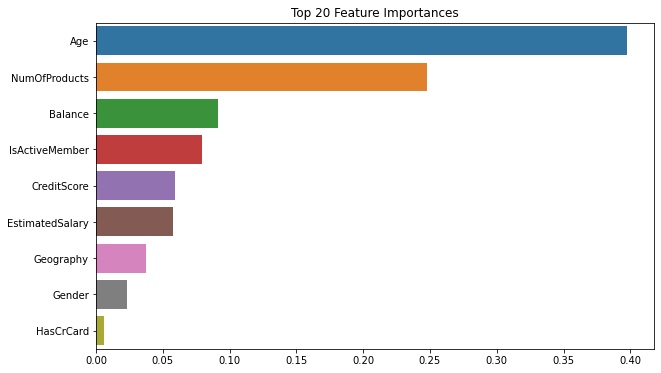



Combination 9: StandardScaling + OneHotEncoding
LogisticRegression model Best parameter {'C': 1.1, 'penalty': 'l2'} 
LogisticRegression test accurarcy 0.8272251308900523


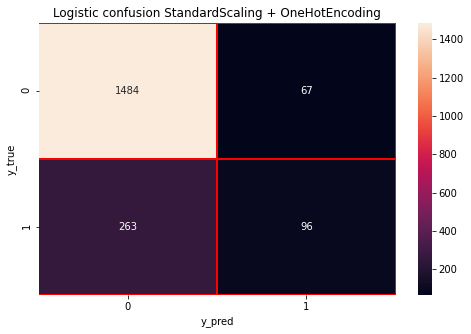

KNeighbors model Best parameter {'n_neighbors': 6} 
KNeighborsClassifier test accurarcy 0.8413612565445027


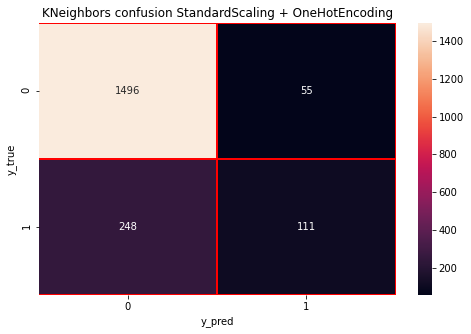

RandomForest Best hyper parameter: {'max_depth': 8, 'max_features': 5, 'min_samples_split': 7, 'n_estimators': 100}
RandomForestClassifier test accurarcy 0.8596858638743455


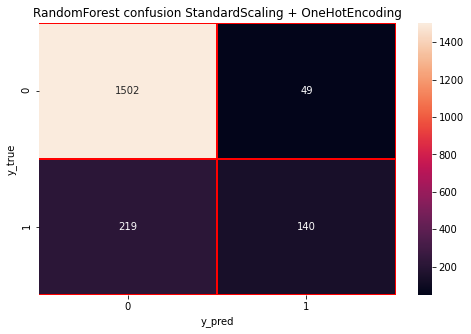

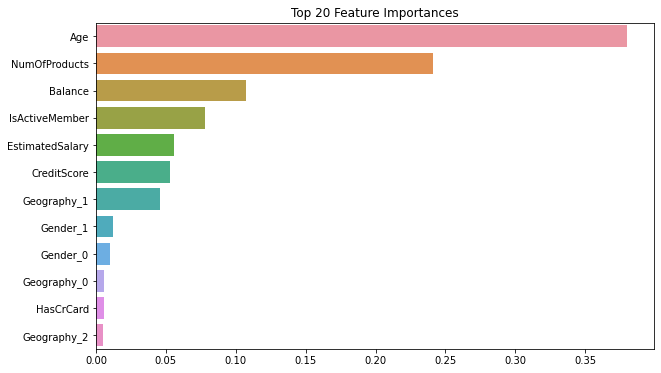



Combination 10: MinMaxScaling + OneHotEncoding
LogisticRegression model Best parameter {'C': 0.1, 'penalty': 'l1'} 
LogisticRegression test accurarcy 0.8272251308900523


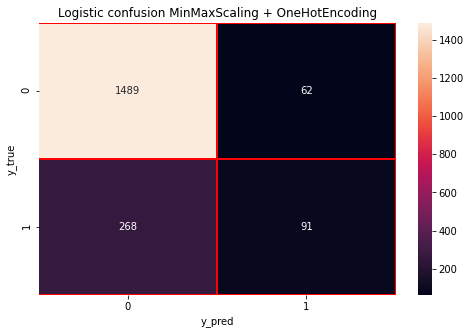

KNeighbors model Best parameter {'n_neighbors': 7} 
KNeighborsClassifier test accurarcy 0.8361256544502618


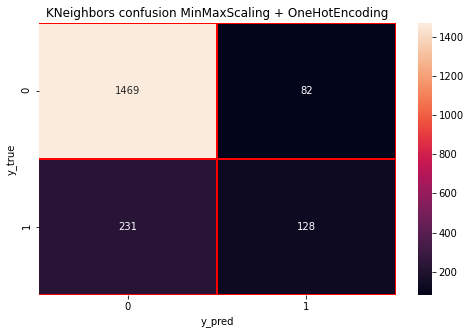

RandomForest Best hyper parameter: {'max_depth': 8, 'max_features': 5, 'min_samples_split': 7, 'n_estimators': 100}
RandomForestClassifier test accurarcy 0.8596858638743455


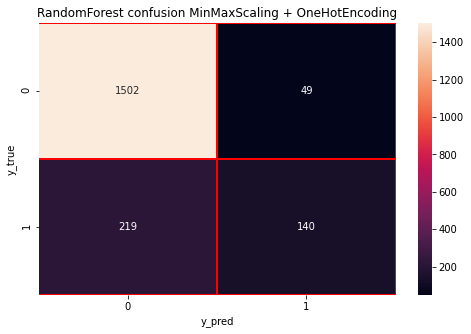

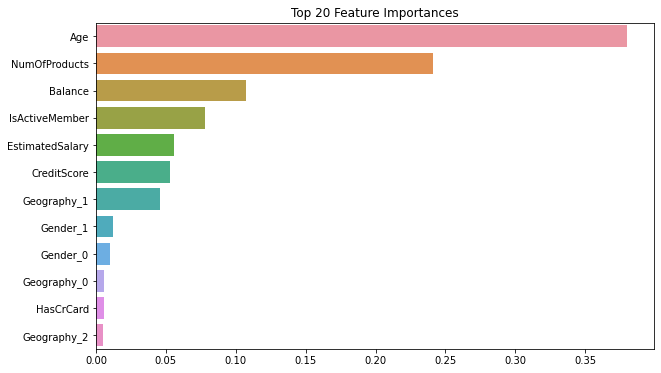



Combination 11: MaxAbsScaling + OneHotEncoding
LogisticRegression model Best parameter {'C': 0.1, 'penalty': 'l1'} 
LogisticRegression test accurarcy 0.8287958115183246


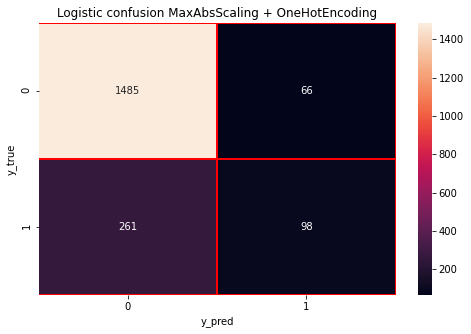

KNeighbors model Best parameter {'n_neighbors': 13} 
KNeighborsClassifier test accurarcy 0.8298429319371727


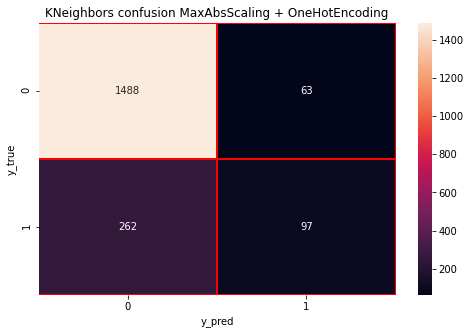

RandomForest Best hyper parameter: {'max_depth': 8, 'max_features': 5, 'min_samples_split': 7, 'n_estimators': 100}
RandomForestClassifier test accurarcy 0.8596858638743455


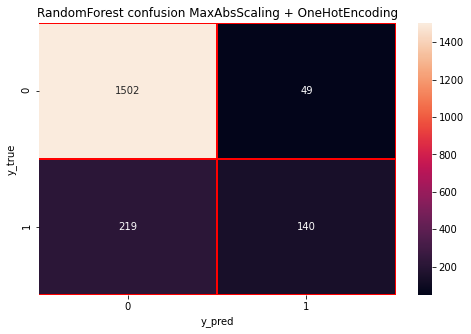

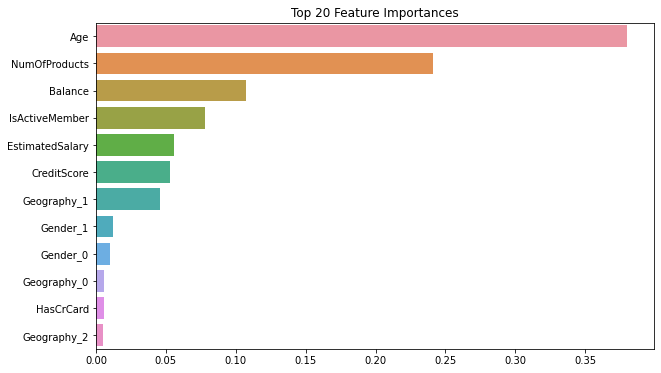



Combination 12: RobustScaling + OneHotEncoding
LogisticRegression model Best parameter {'C': 0.1, 'penalty': 'l1'} 
LogisticRegression test accurarcy 0.830890052356021


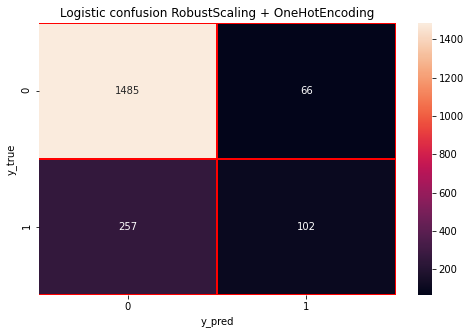

KNeighbors model Best parameter {'n_neighbors': 7} 
KNeighborsClassifier test accurarcy 0.831413612565445


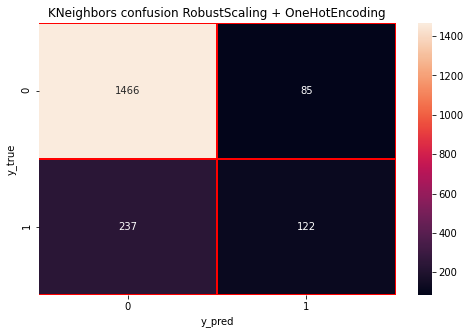

RandomForest Best hyper parameter: {'max_depth': 8, 'max_features': 5, 'min_samples_split': 7, 'n_estimators': 100}
RandomForestClassifier test accurarcy 0.8596858638743455


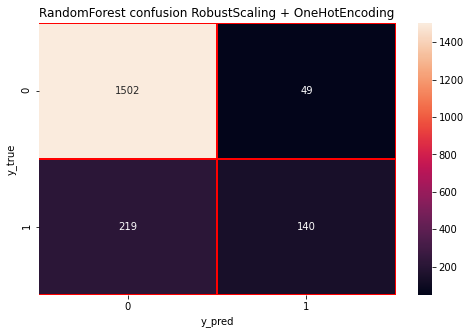

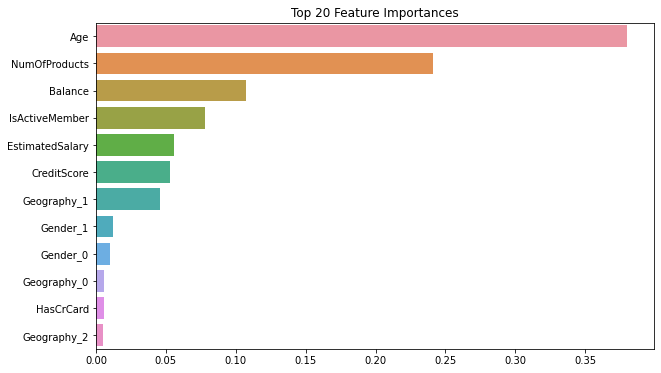



Exited
0    36.200125
1    43.976630
Name: Age, dtype: float64


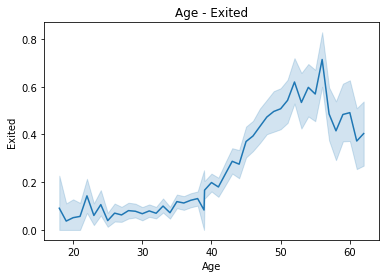

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter
from sklearn.impute import KNNImputer
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import warnings
warnings.simplefilter(action='ignore')
from sklearn.model_selection import train_test_split, GridSearchCV
# Extract the index of the row with outliers from the feature
def outlier(df, feature):
    out_indexer = []
    for i in feature:
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)

        IQR = Q3 - Q1

        alt_sinir = Q1 - 1.5 * IQR
        ust_sinir = Q3 + 1.5 * IQR

        out = ((df[i] < alt_sinir) | (df[i] > ust_sinir))

        out_index = df[i][out].index
        out_indexer.extend(out_index)

    out_indexer = Counter(out_indexer)

    outlier_index = [i for i, v in out_indexer.items() if v > 0]
    return outlier_index

'''
# Open source Software Source Code
The parameter df is a clean data frame with missing values removed.
The parameter encoder is a list in which each encoder is stored.
Output the encoded value according to the encoder
'''
def encoding(df, encoder):
    if encoder == 'OrdinalEncoding':
        enc = preprocessing.OrdinalEncoder()
        encoded = enc.fit_transform(df)
        encoded = pd.DataFrame(data=encoded, columns=df.columns)
    elif encoder == 'LabelEncoding':
        for i in df:
            df[i] = preprocessing.LabelEncoder().fit_transform(df[i])
        encoded = df
    elif encoder == 'OneHotEncoding':
        encoded = pd.get_dummies(data=df, columns=df.columns)

    return encoded
'''
#Open source Software Source Code
A switch function representing each combination
'''
def switch(x):
    return {1: "StandardScaling + LabelEncoding",
            2: "MinMaxScaling + LabelEncoding",
            3: "MaxAbsScaling + LabelEncoding",
            4: "RobustScaling + LabelEncoding",
            5: "StandardScaling + OrdinalEncoding",
            6: "MinMaxScaling + OrdinalEncoding",
            7: "MaxAbsScaling + OrdinalEncoding",
            8: "RobustScaling + OrdinalEncoding",
            9: "StandardScaling + OneHotEncoding",
            10: "MinMaxScaling + OneHotEncoding",
            11: "MaxAbsScaling + OneHotEncoding",
            12: "RobustScaling + OneHotEncoding"}[x]
'''
# Open source Software Source Code
The parameter df is a clean data frame with missing values removed.
The parameter scaler is a list in which each scaler is stored.
Output the scaled value according to the scaler.
'''
def scaling(df, scaler):
    if scaler == 'StandardScaling':
        scaler = preprocessing.MaxAbsScaler()
        scaled_df = scaler.fit_transform(df)
    elif scaler == 'MinMaxScaling':
        scaler = preprocessing.MinMaxScaler()
        scaled_df = scaler.fit_transform(df)
    elif scaler == 'MaxAbsScaling':
        scaler = preprocessing.RobustScaler()
        scaled_df = scaler.fit_transform(df)
    elif scaler == 'RobustScaling':
        scaler = preprocessing.StandardScaler()
        scaled_df = scaler.fit_transform(df)

    scaled_Df = pd.DataFrame(data=scaled_df, columns=df.columns)
    return scaled_Df

'''
# Open source Software Source Code
The parameter df is a clean data frame with missing values removed.
The parameter target is 'Exited'
The bank, the user of this function,can see the optimal parameters 
and the best performance for each model at once by calling
with a clean data set and target value as parameters.
'''
def machineLearning(df, target):
    X = df.drop(target, axis=1)
    y = df[target]

    # Divide X to Categorical X_cate and Numeric X_nume
    X_category = X.select_dtypes(include='object')
    X_numerical = X.select_dtypes(exclude='object')

    # Store each scaler and encoder in each list
    scaler_list = ['StandardScaling', 'MinMaxScaling', 'MaxAbsScaling', 'RobustScaling']
    encoder_list = ['OrdinalEncoding', 'LabelEncoding', 'OneHotEncoding']

    # Array to store encoded values
    dataEncodeList = ['Label', 'Ordinal', 'OneHot']

    # An array containing a combination of encoding and scaling
    dataFrameList = ['stl', 'mml', 'mal', 'rbl'
        , 'sto', 'mmo', 'mao', 'rbo'
        , 'stoh', 'mmoh', 'maoh', 'rboh']

    # The category column is encoded by calling the encoding function.
    for i in range(len(encoder_list)):
        df_category = encoding(X_category, encoder_list[i])
        dataEncodeList[i] = pd.concat([df_category, X_numerical], axis=1)

    # Scale the data that is Encoded
    for i in range(len(dataEncodeList)):
        for j in range(len(scaler_list)):
            if i == 0:
                dataFrameList[j] = scaling(dataEncodeList[i], scaler_list[j])
            elif i == 1:
                dataFrameList[i + j + 3] = scaling(dataEncodeList[i], scaler_list[j])
            else:
                dataFrameList[i + j + 6] = scaling(dataEncodeList[i], scaler_list[j])
    i = 1
    for x in dataFrameList:
        print("Combination {}: ".format(i) + switch(i))

        # Divide the data set into train and test
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)

        # Logistic model tuning and best parameter and score output
        params = {'penalty': ['l1', 'l2'],
                  'C': np.arange(.1, 5)}
        loj = LogisticRegression(solver="liblinear")
        loj_turned = GridSearchCV(loj, params, cv=5)
        loj_turned.fit(X_train, y_train)
        y_pred = loj_turned.predict(X_test)
        print("LogisticRegression model Best parameter {} ".format(loj_turned.best_params_))
        print("LogisticRegression test accurarcy {}".format(loj_turned.score(X_test, y_test)))

        # Logistic confusion matrix
        y_true = y_test
        df_y = confusion_matrix(y_true, y_pred)
        f, ax = plt.subplots(figsize=(8, 5))
        sns.heatmap(df_y, annot=True, linewidths=0.5, linecolor="red", fmt=".0f", ax=ax)
        plt.title("Logistic confusion " + switch(i))
        plt.xlabel("y_pred")
        plt.ylabel("y_true")
        plt.show()

        # KNeighbors model tuning and best parameter and score output
        knn_params = {"n_neighbors": np.arange(1, 20)}
        knn = KNeighborsClassifier()
        knn_cv = GridSearchCV(knn, knn_params, cv=10)
        knn_cv.fit(X_train, y_train)
        y_pred = knn_cv.predict(X_test)
        print("KNeighbors model Best parameter {} ".format(knn_cv.best_params_))
        print("KNeighborsClassifier test accurarcy {}".format(knn_cv.score(X_test, y_test)))

        # KNeighbors confusion matrix
        y_true = y_test
        df_y = confusion_matrix(y_true, y_pred)
        f, ax = plt.subplots(figsize=(8, 5))
        sns.heatmap(df_y, annot=True, linewidths=0.5, linecolor="red", fmt=".0f", ax=ax)
        plt.title("KNeighbors confusion " + switch(i))
        plt.xlabel("y_pred")
        plt.ylabel("y_true")
        plt.show()

        # ----------------------------------------------------------------
        # RandomForestClassfier Hyperparameter
        params = {
            'n_estimators': [100, 300],
            'max_depth': [6, 8],
            'max_features': [3, 5],
            'min_samples_split': [5, 7]}

        # RandomForestClassfier model tuning and best parameter and score output
        rf_model = RandomForestClassifier(random_state=0)
        grid_cv = GridSearchCV(rf_model, param_grid=params, cv=5)
        grid_cv.fit(X_train, y_train)
        y_pred = grid_cv.predict(X_test)
        print('RandomForest Best hyper parameter: {0}'.format(grid_cv.best_params_))
        print("RandomForestClassifier test accurarcy {}".format(grid_cv.score(X_test, y_test)))

        # RandomForest confusion matrix
        y_true = y_test
        df_y = confusion_matrix(y_true, y_pred)
        f, ax = plt.subplots(figsize=(8, 5))
        sns.heatmap(df_y, annot=True, linewidths=0.5, linecolor="red", fmt=".0f", ax=ax)
        plt.title("RandomForest confusion " + switch(i))
        plt.xlabel("y_pred")
        plt.ylabel("y_true")
        plt.show()

        ## Picking the top 20 important features when training a model
        ftr_importances_values = grid_cv.best_estimator_.feature_importances_
        ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
        ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
        plt.figure(figsize=(10, 6))
        plt.title('Top 20 Feature Importances')
        sns.barplot(x=ftr_top20, y=ftr_top20.index)
        plt.show()
        print("\n")
        i += 1


df = pd.read_csv("churn.csv")
# #Drop columns that are unrelated to churn rate - RowNumber, Surname and Customer ID
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

imputer = KNNImputer(n_neighbors=50)
# Fill Null of ['Balance'] with KNN Imputer
bal = df[['Balance']]
df['Balance'] = imputer.fit_transform(bal)

# Fill Null values in Age with its mean value
df['Age'].fillna(df['Age'].mean(), inplace=True)

# Fill typo or wrong value in Gender with its mode value
if (df['Gender'] != "Female").bool == True:
    df['Gender'] = np.NaN
if (df['Gender'] != "Male").bool == True:
    df['Gender'] = np.NaN
df['Gender'].fillna(df['Gender'].mode(), inplace=True)

# There are Null and outliers in 'Tenure' Column - Minus and values more than 100
# Replace them with bfill
if (df['Tenure'] < 0).bool == True:
    df['Tenure'] = np.NaN
if (df['Tenure'] > 100).bool == True:
    df['Tenure'] = np.NaN
df['Tenure'].fillna(method='bfill', inplace=True)

# Negative Value in NumOfProduct
m1 = len(df[(df['NumOfProducts'] == -1)])
m2 = len(df[(df['NumOfProducts'] == -2)])

# 22 (-)Values exists - fill them with "ffill"
if (df['NumOfProducts'] == -1).bool == True:
    df['NumOfProducts'] = np.NaN
if (df['NumOfProducts'] == -2).bool == True:
    df['NumOfProducts'] = np.NaN

df['NumOfProducts'].fillna(method='ffill', inplace=True)

# Fill EstimatedSalary column's null value
df['EstimatedSalary'].fillna(df['EstimatedSalary'].mean(), inplace=True)

# Find outlier indexes
outlier_index = outlier(df, ["CreditScore", "Age", "Balance", "NumOfProducts", "EstimatedSalary"])

# Deletion outlier values.
df = df.drop(outlier_index, axis=0).reset_index(drop=True)
# Tenure don't effect to Target(Exited)
df = df.drop(['Tenure'], axis=1)

'''
When the machineLearning function is called, a combination of 3 encoders and 4 scalers is created,
and LogisticRegression, KNeighborsClassifier, and RandomForestClassifier machine learning algorithms are run for each combination.
Since GridSearchCV was used for each model, you can check the optimal parameters and the highest accuracy.
'''
machineLearning(df, 'Exited')

# Display the exited rate by age
sns.lineplot(x = "Age", y = "Exited", data = df)
print(df.groupby(df["Exited"])["Age"].mean())
plt.title("Age - Exited")
plt.show()